# Deep_freeze_AC_Sales Forecasting

                                                                                                
                                                                                                Enes_YILDIZ
                                                                                                
Steps

1- Necessary libraries uploaded

2- Data upload and check

3- Visual check for trend and null values or outliers

4- Dataframe cleaning- best for use 

5- Variables and Values check ad plotting

6- Testing phases

 a-Stationary Testing-ADF Test
 
 b-GrangerCausality Test
 
 c- Acf-Pacf Test

7- Build the Model

   a-Construct ARIMA (determining p and q values)
    
   b-Prediction

In [1]:
import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#data is uploaded
data=pd.read_excel('TV_Sales.xlsx', index_col=None,sheet_name='Branch_Deep_freeze_AC', parse_dates=True)
data.head()

,Kademe 3,Takvim yılı,Takvim ayı,Perakende Miktar
0,Derin Dondurucu,2016,Kasım,2.022059
1,Derin Dondurucu,2017,Nisan,4.044117
2,Derin Dondurucu,2017,Haziran,2.022059
3,Derin Dondurucu,2017,Temmuz,4.044117
4,Derin Dondurucu,2017,Ağustos,34.374996


In [3]:
data.dtypes

Kademe 3             object
Takvim yılı           int64
Takvim ayı           object
Perakende Miktar    float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kademe 3          86 non-null     object 
 1   Takvim yılı       86 non-null     int64  
 2   Takvim ayı        86 non-null     object 
 3   Perakende Miktar  86 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ KB


In [5]:
tot=len(data)
nof_dd=len(data[data["Kademe 3"]=='Derin Dondurucu'])
nof_klima=tot-nof_dd

In [6]:
def month_converter(df,column_name):
    for row in range(len(df[column_name])):
        if df[column_name][row]=='Ocak':
            df[column_name][row]=1
        elif df[column_name][row]=='Şubat':
            df[column_name][row]=2
        elif df[column_name][row]=='Mart':
            df[column_name][row]=3
        elif df[column_name][row]=='Nisan':
            df[column_name][row]=4
        elif df[column_name][row]=='Mayıs':
            df[column_name][row]=5
        elif df[column_name][row]=='Haziran':
            df[column_name][row]=6
        elif df[column_name][row]=='Temmuz':
            df[column_name][row]=7
        elif df[column_name][row]=='Ağustos':
            df[column_name][row]=8
        elif df[column_name][row]=='Eylül':
            df[column_name][row]=9
        elif df[column_name][row]=='Ekim':
            df[column_name][row]=10
        elif df[column_name][row]=='Kasım':
            df[column_name][row]=11
        elif df[column_name][row]=='Aralık':
            df[column_name][row]=12
        else:
            print('Error Occured ')
    return df      

In [7]:
month_converter(data,'Takvim ayı')

<ipython-input-6-bd76da123bb1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][row]=11
<ipython-input-6-bd76da123bb1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][row]=4
<ipython-input-6-bd76da123bb1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][row]=6
<ipython-input-6-bd76da123bb1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,Kademe 3,Takvim yılı,Takvim ayı,Perakende Miktar
0,Derin Dondurucu,2016,11,2.022059
1,Derin Dondurucu,2017,4,4.044117
2,Derin Dondurucu,2017,6,2.022059
3,Derin Dondurucu,2017,7,4.044117
4,Derin Dondurucu,2017,8,34.374996
...,...,...,...,...
81,Klima,2020,7,119.301455
82,Klima,2020,8,50.551464
83,Klima,2020,9,24.264703
84,Klima,2020,10,38.419113


In [8]:
data['time']=data['Takvim yılı'].astype(str) +'-'+ data['Takvim ayı'].astype(str)

In [9]:
data['time']=pd.to_datetime(data.time, format='%Y-%m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Kademe 3          86 non-null     object        
 1   Takvim yılı       86 non-null     int64         
 2   Takvim ayı        86 non-null     object        
 3   Perakende Miktar  86 non-null     float64       
 4   time              86 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.5+ KB


In [10]:
data_dd=data[0:nof_dd]
data_klima=data[nof_dd:]
data_klima.head(5)

,Kademe 3,Takvim yılı,Takvim ayı,Perakende Miktar,time
40,Klima,2016,11,10.110293,2016-11-01
41,Klima,2016,12,4.044117,2016-12-01
42,Klima,2017,1,14.154410,2017-01-01
43,Klima,2017,2,28.308820,2017-02-01
44,Klima,2017,4,10.110293,2017-04-01


In [11]:
data_klima=data_klima.drop('Kademe 3',axis=1)
data_klima = data_klima.rename(columns={'Perakende Miktar': 'Klima_Perakende_Miktar'})
data_klima.head(5)

,Takvim yılı,Takvim ayı,Klima_Perakende_Miktar,time
40,2016,11,10.110293,2016-11-01
41,2016,12,4.044117,2016-12-01
42,2017,1,14.154410,2017-01-01
43,2017,2,28.308820,2017-02-01
44,2017,4,10.110293,2017-04-01


In [12]:
data_dd=data_dd.drop('Kademe 3',axis=1)
data_dd = data_dd.rename(columns={'Perakende Miktar': 'DD_Perakende_Miktar'})
data_dd.head(5)

,Takvim yılı,Takvim ayı,DD_Perakende_Miktar,time
0,2016,11,2.022059,2016-11-01
1,2017,4,4.044117,2017-04-01
2,2017,6,2.022059,2017-06-01
3,2017,7,4.044117,2017-07-01
4,2017,8,34.374996,2017-08-01


In [13]:
merge_data=pd.merge(data_klima,data_dd[['DD_Perakende_Miktar','time']], how='left', on='time')
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Takvim yılı             46 non-null     int64         
 1   Takvim ayı              46 non-null     object        
 2   Klima_Perakende_Miktar  46 non-null     float64       
 3   time                    46 non-null     datetime64[ns]
 4   DD_Perakende_Miktar     38 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.2+ KB


In [14]:
t='time'

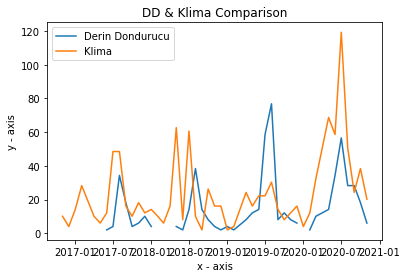

In [21]:
plt.plot(merge_data[t],merge_data.iloc[:,4], label = "Derin Dondurucu")
plt.plot(merge_data[t],merge_data.iloc[:,2], label = "Klima")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('DD & Klima Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [22]:
filled_data=merge_data.bfill().interpolate()
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Takvim yılı             46 non-null     int64         
 1   Takvim ayı              46 non-null     int64         
 2   Klima_Perakende_Miktar  46 non-null     float64       
 3   time                    46 non-null     datetime64[ns]
 4   DD_Perakende_Miktar     46 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.2 KB


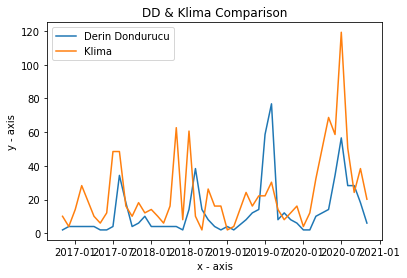

In [23]:
plt.plot(filled_data[t],filled_data.iloc[:,4], label = "Derin Dondurucu")
plt.plot(filled_data[t],filled_data.iloc[:,2], label = "Klima")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('DD & Klima Comparison')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [24]:
target_dd='DD_Perakende_Miktar'
target_k='Klima_Perakende_Miktar'

In [25]:
from sklearn.metrics import mean_absolute_error 
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

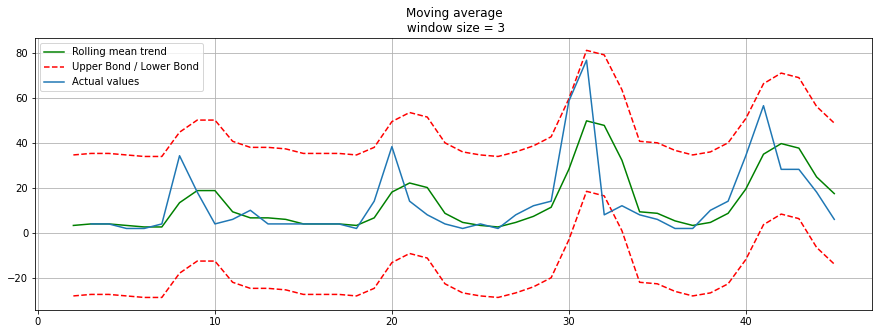

In [26]:
plotMovingAverage(filled_data[target_dd], 3, plot_intervals=True)

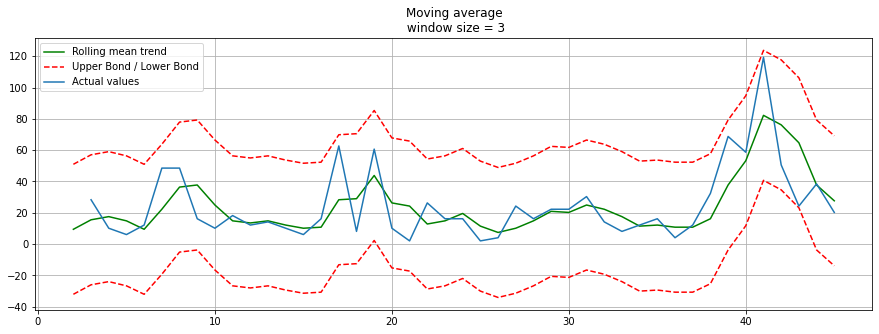

In [27]:
plotMovingAverage(filled_data[target_k], 3, plot_intervals=True)

# Augmented Dickey Fuller Test for Stationary Testing

In [28]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [29]:
adfuller_test(filled_data[target_dd], name=target_dd)

    Augmented Dickey-Fuller Test on "DD_Perakende_Miktar" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8946
 No. Lags Chosen       = 9
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.7898. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [30]:
adfuller_test(filled_data[target_k], name=target_k)

    Augmented Dickey-Fuller Test on "Klima_Perakende_Miktar" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1251
 No. Lags Chosen       = 1
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.0248. Rejecting Null Hypothesis.
 => Series is Stationary.


# 1 degree differentiation for stationarity

In [31]:
clean_data=filled_data[['DD_Perakende_Miktar','Klima_Perakende_Miktar','time']]
clean_data = clean_data.set_index(pd.DatetimeIndex(clean_data['time']))
clean_data.drop('time',axis=1,inplace=True)

In [32]:
clean_data_diff=clean_data.diff().dropna()
clean_data_diff.head()

,DD_Perakende_Miktar,Klima_Perakende_Miktar
time,,
2016-12-01,2.022059,-6.066176
2017-01-01,0.000000,10.110293
2017-02-01,0.000000,14.154410
2017-04-01,0.000000,-18.198527
2017-05-01,-2.022059,-4.044117


# Causality Test between DD&Klima 

In [33]:
max_lags=5

In [34]:
results=grangercausalitytests(clean_data_diff[[target_k,target_dd]], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
print('Column - {} : P_Values - {}'.format(target_dd,p_values))

Column - DD_Perakende_Miktar : P_Values - [0.728, 0.5307, 0.6853, 0.8399, 0.9092]


# AutoCorrelation and Partial AC Testing

In [35]:
# Calculate ACF and PACF upto 30 lags
acf_30 = acf(clean_data_diff[target_dd], nlags=30)
pacf_50 = pacf(clean_data_diff[target_dd], nlags=30)

C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\menes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


C:\Users\menes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


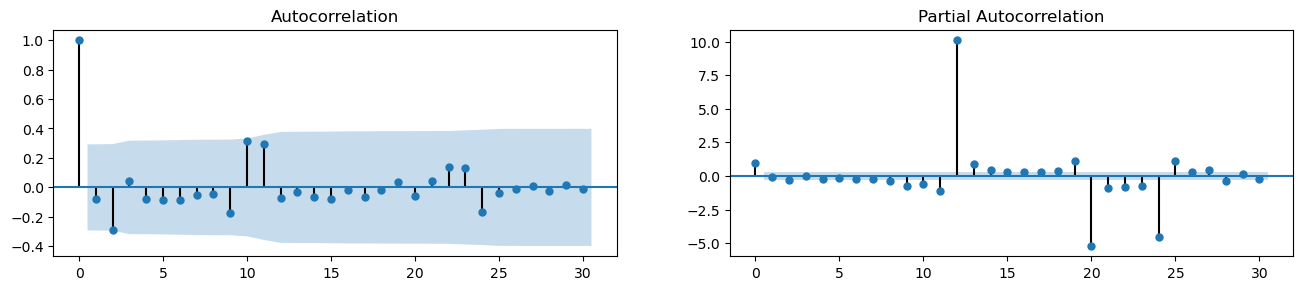

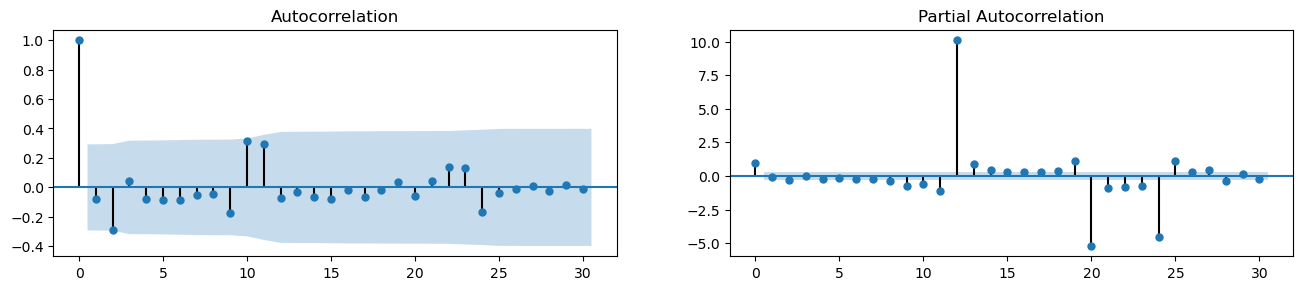

In [36]:

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(clean_data_diff[target_dd].tolist(), lags=30, ax=axes[0])
plot_pacf(clean_data_diff[target_dd].tolist(), lags=30, ax=axes[1])

C:\Users\menes\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


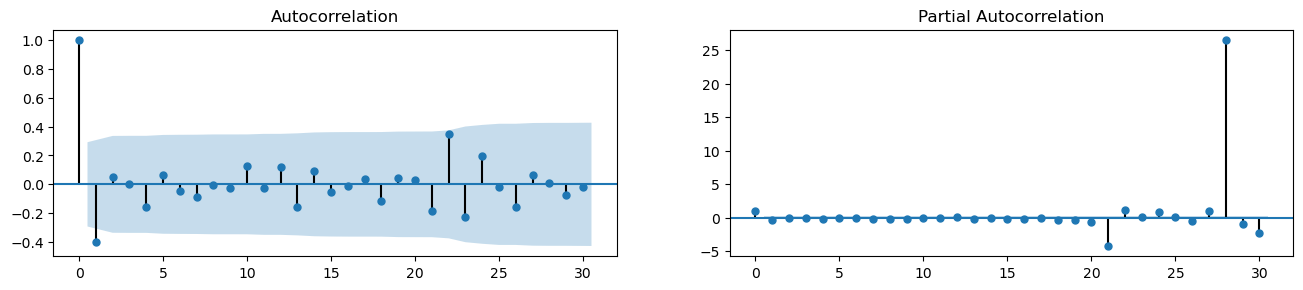

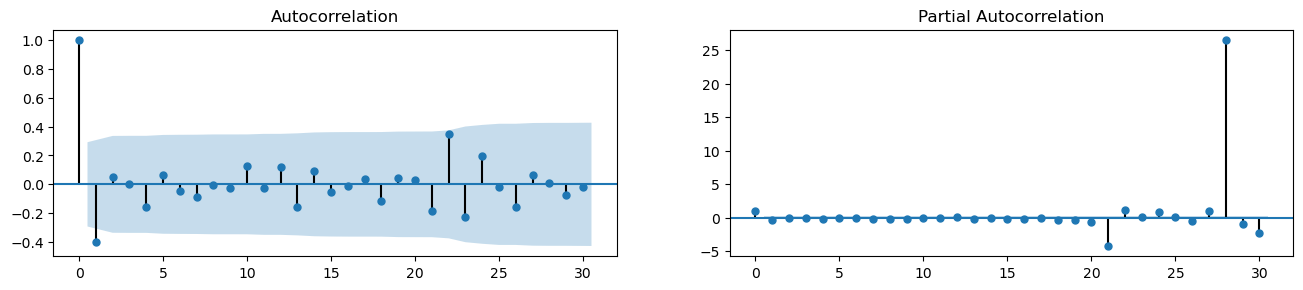

In [37]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(clean_data_diff[target_k].tolist(), lags=30, ax=axes[0])
plot_pacf(clean_data_diff[target_k].tolist(), lags=30, ax=axes[1])

C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


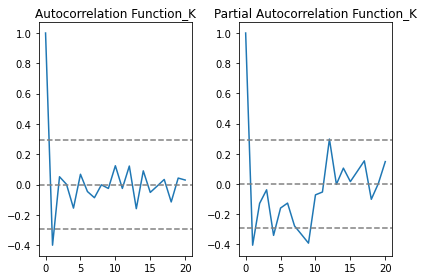

In [38]:
lag_acf = acf(clean_data_diff[target_k], nlags=20)
lag_pacf = pacf(clean_data_diff[target_k], nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(clean_data_diff[target_k])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(clean_data_diff[target_k])),linestyle='--',color='gray')
plt.title('Autocorrelation Function_K')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(clean_data_diff[target_k])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(clean_data_diff[target_k])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function_K')
plt.tight_layout()

C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


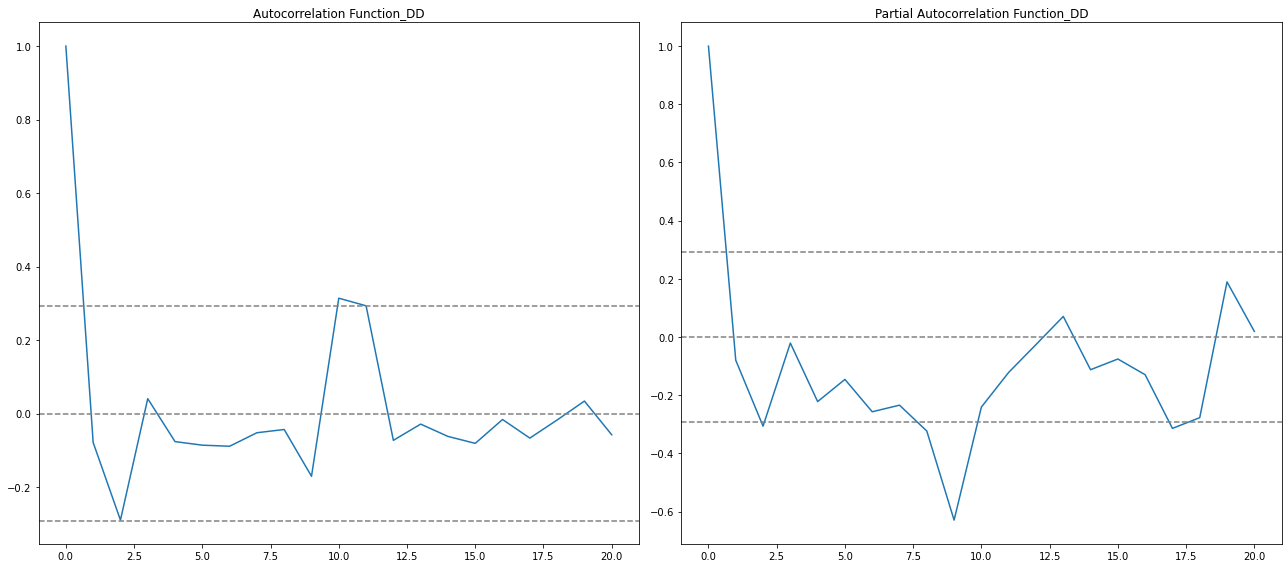

In [184]:
lag_acf_dd = acf(clean_data_diff[target_dd], nlags=20)
lag_pacf_dd= pacf(clean_data_diff[target_dd], nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_dd)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(clean_data_diff[target_dd])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(clean_data_diff[target_dd])),linestyle='--',color='gray')
plt.title('Autocorrelation Function_DD')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_dd)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(clean_data_diff[target_dd])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(clean_data_diff[target_dd])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function_DD')
plt.tight_layout()

# Prediction with ARIMA

C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0.5, 1.0, 'RSS: 18894.1542')

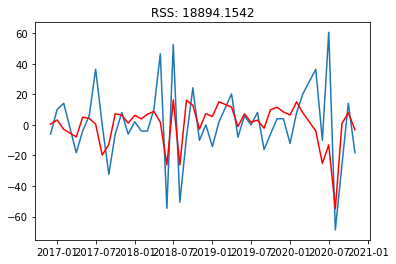

In [39]:
model_k = ARIMA(clean_data[target_k], order=(2, 1, 2))  
results_AR_k = model_k.fit(disp=-1)  
plt.plot(clean_data_diff[target_k])
plt.plot(results_AR_k.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_k.fittedvalues-clean_data_diff[target_k])**2))

C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\menes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\menes\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


Text(0.5, 1.0, 'RSS: 8592.7715')

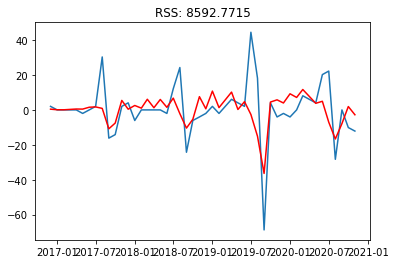

In [40]:
model_dd = ARIMA(clean_data[target_dd], order=(2, 1, 2))  
results_AR_dd = model_dd.fit(disp=-1)  
plt.plot(clean_data_diff[target_dd])
plt.plot(results_AR_dd.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_dd.fittedvalues-clean_data_diff[target_dd])**2))

In [41]:
pred_AR_diff_dd = pd.Series(results_AR_dd.fittedvalues, copy=True)
print (pred_AR_diff_dd)

time
2016-12-01     0.420532
2017-01-01     0.076414
2017-02-01     0.064100
2017-04-01     0.503072
2017-05-01     0.460231
2017-06-01     1.532994
2017-07-01     1.705628
2017-08-01     0.870747
2017-09-01   -10.823167
2017-10-01    -7.543394
2017-11-01     5.424969
2017-12-01     0.398301
2018-01-01     2.535115
2018-02-01     1.001838
2018-03-01     6.091991
2018-04-01     1.236955
2018-05-01     5.975515
2018-06-01     1.482381
2018-07-01     6.753896
2018-08-01    -2.159674
2018-09-01   -10.424526
2018-10-01    -5.365184
2018-11-01     7.581278
2018-12-01     0.638708
2019-01-01    10.770515
2019-02-01     1.297828
2019-04-01    10.201083
2019-05-01     0.236700
2019-06-01     4.728058
2019-07-01    -2.629202
2019-08-01   -15.082279
2019-09-01   -36.397069
2019-10-01     4.498976
2019-11-01     5.767499
2019-12-01     3.961789
2020-01-01     9.232626
2020-02-01     7.135244
2020-03-01    11.686515
2020-05-01     3.779865
2020-06-01     4.936673
2020-07-01    -7.030902
2020-08-01 

In [42]:
pred_AR_diff_k = pd.Series(results_AR_k.fittedvalues, copy=True)
print (pred_AR_diff_k)

time
2016-12-01     0.526021
2017-01-01     3.222906
2017-02-01    -2.908919
2017-04-01    -7.898743
2017-05-01     5.057030
2017-06-01     4.246325
2017-07-01     0.491310
2017-08-01   -19.720789
2017-09-01   -12.831460
2017-10-01     7.249232
2017-11-01     6.444434
2017-12-01     1.189579
2018-01-01     6.277230
2018-02-01     3.919369
2018-03-01     6.961638
2018-04-01     8.804525
2018-05-01     1.788480
2018-06-01   -26.154602
2018-07-01    16.304166
2018-08-01   -26.192650
2018-09-01    16.220298
2018-10-01    12.840462
2018-11-01    -2.797049
2018-12-01     7.391724
2019-01-01     5.520677
2019-02-01    15.145741
2019-04-01    11.642076
2019-05-01    -1.058174
2019-06-01     7.196904
2019-07-01     1.772185
2019-08-01     3.087992
2019-09-01    -2.193855
2019-10-01     9.932280
2019-11-01    11.584927
2019-12-01     8.475686
2020-01-01     6.498159
2020-02-01    15.093119
2020-03-01     7.954478
2020-05-01    -3.956056
2020-06-01   -25.181382
2020-07-01   -13.090496
2020-08-01 

In [43]:
pred_AR_diff_cumsum_dd = pred_AR_diff_dd.cumsum()
print (pred_AR_diff_cumsum_dd.head())

time
2016-12-01    0.420532
2017-01-01    0.496946
2017-02-01    0.561046
2017-04-01    1.064118
2017-05-01    1.524348
dtype: float64


In [44]:
pred_AR_diff_cumsum_k = pred_AR_diff_k.cumsum()
print (pred_AR_diff_cumsum_k.head)

<bound method NDFrame.head of time
2016-12-01      0.526021
2017-01-01      3.748928
2017-02-01      0.840008
2017-04-01     -7.058735
2017-05-01     -2.001705
2017-06-01      2.244620
2017-07-01      2.735930
2017-08-01    -16.984859
2017-09-01    -29.816319
2017-10-01    -22.567087
2017-11-01    -16.122653
2017-12-01    -14.933074
2018-01-01     -8.655844
2018-02-01     -4.736475
2018-03-01      2.225163
2018-04-01     11.029688
2018-05-01     12.818169
2018-06-01    -13.336434
2018-07-01      2.967733
2018-08-01    -23.224917
2018-09-01     -7.004619
2018-10-01      5.835843
2018-11-01      3.038793
2018-12-01     10.430518
2019-01-01     15.951194
2019-02-01     31.096936
2019-04-01     42.739012
2019-05-01     41.680838
2019-06-01     48.877742
2019-07-01     50.649927
2019-08-01     53.737919
2019-09-01     51.544064
2019-10-01     61.476344
2019-11-01     73.061271
2019-12-01     81.536958
2020-01-01     88.035116
2020-02-01    103.128236
2020-03-01    111.082714
2020-05-01    1

In [45]:
pred_AR_diff_cumsum_k=pd.DataFrame(pred_AR_diff_cumsum_k)
pred_AR_diff_cumsum_k.head()

,0
time,
2016-12-01,0.526021
2017-01-01,3.748928
2017-02-01,0.840008
2017-04-01,-7.058735
2017-05-01,-2.001705


# Gathering Output Results & Comparison

In [49]:
comparison_k=pd.merge(clean_data,pred_AR_diff_cumsum_k, how='inner', on='time')
comparison_k = comparison_k.rename(columns={0: 'Pred_Klima'})
comparison_k.head()

,DD_Perakende_Miktar,Klima_Perakende_Miktar,Pred_Klima
time,,,
2016-12-01,4.044117,4.044117,0.526021
2017-01-01,4.044117,14.154410,3.748928
2017-02-01,4.044117,28.308820,0.840008
2017-04-01,4.044117,10.110293,-7.058735
2017-05-01,2.022059,6.066176,-2.001705


In [51]:
pred_AR_diff_cumsum_dd=pd.DataFrame(pred_AR_diff_cumsum_dd)

comparison_dd=pd.merge(clean_data,pred_AR_diff_cumsum_dd, how='inner', on='time')
comparison_dd = comparison_dd.rename(columns={0: 'Pred_Derin_Dondurucu'})
comparison_dd.head()

,DD_Perakende_Miktar,Klima_Perakende_Miktar,Pred_Derin_Dondurucu
time,,,
2016-12-01,4.044117,4.044117,0.420532
2017-01-01,4.044117,14.154410,0.496946
2017-02-01,4.044117,28.308820,0.561046
2017-04-01,4.044117,10.110293,1.064118
2017-05-01,2.022059,6.066176,1.524348


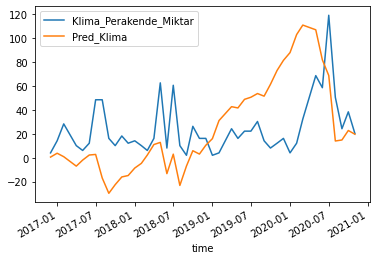

In [52]:
comparison_k[['Klima_Perakende_Miktar','Pred_Klima']].plot()

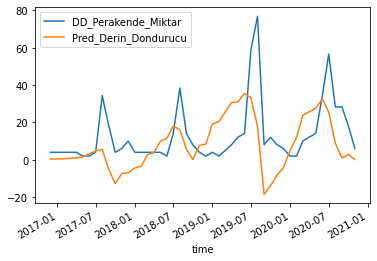

In [53]:
comparison_dd[['DD_Perakende_Miktar','Pred_Derin_Dondurucu']].plot()